Jacob Graham 

January 30, 2024


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
import os

In [4]:
out_path = 'sort_namd_energy_into_single_csv_out'

In [5]:
if os.path.exists(out_path) == False:
    os.mkdir(out_path)

# Read CSV Files Into Data Frame

In [6]:
# Read list of simulation names to be used as data labels and access files containing those names.
file_path = 'names_successful_sims_only.txt'
with open(file_path, 'r') as file:
    # Read the contents of the file.
    names = file.read()
    # Split the content into individual words based on whitespace.
    names = names.split()

In [7]:
# Sort nonbonded, van der waals, and electrostatic forces into 'pandas dataframes'
df_vdw = pd.DataFrame()
df_es = pd.DataFrame()
df_nb = pd.DataFrame()

for i in range(len(names)):
    csv_to_read = 'namdenergy_' + names[i] + '.csv'
    df = pd.read_csv(csv_to_read, delimiter=r"\s+")
    # Sort columns for van der waals, electrostatic, and total nonbonded energies into pandas dataframes.
    # Extract Vdw, Elec, and Nonbond column, and save them as pandas series.
    vdw_data = pd.Series(df['VdW'].values)
    es_data = pd.Series(df['Elec'].values)
    nb_data = pd.Series(df['Nonbond'].values)
    # Add columns to df_vdw, df_es, df_nb corresponding to values in the pandas series for current simulation, names[i].
    df_vdw[f'{names[i]}'] = vdw_data
    df_es[f'{names[i]}'] = es_data
    df_nb[f'{names[i]}'] = nb_data

In [8]:
# Add time series data to all dataframes.
stride = 25000 # Time between dumping trajectory outputs.
time = range(0,df_nb.shape[0]*stride,stride)
df_vdw['Time (fs)'] = pd.Series(time)
df_es['Time (fs)'] = pd.Series(time)
df_nb['Time (fs)'] = pd.Series(time)

In [6]:
# pip install openpyxl

In [7]:
# Reassign primary sequence corresponding to each simulation name.
# df_ps = pd.read_excel('../initial_library_max_distance_44.xlsx', sheet_name='For Simulations')


# Save to CSV Files

In [8]:
# Save pandas dataframes as csv files.
df_vdw.T.to_csv('VanDerWaals_energy.csv',index=True,header=False)
df_es.T.to_csv('Electrostatic_energy.csv',index=True,header=False)
df_nb.T.to_csv('TotalNonbonded_energy.csv',index=True,header=False)

# Make Plots

Text(0, 0.5, 'Energy (kcal/mol)')

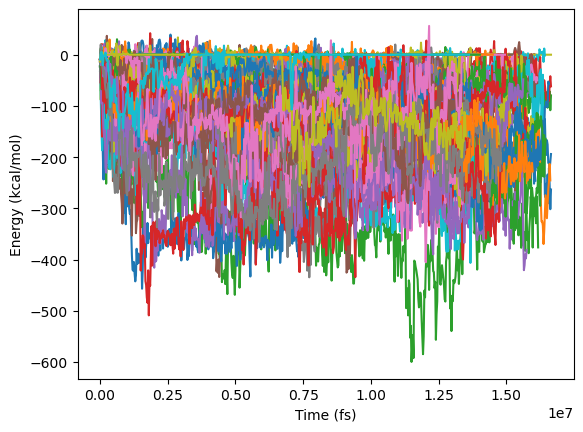

In [11]:
ax = df_nb.plot(x='Time (fs)',y=names,legend=None)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Energy (kcal/mol)')

# Plot Total Nonbonded Energy

In [9]:
import numpy as np

Average of dimerization_nfp5_cfp5_no_mutation: -148.39726941529236
Average of L1: -111.77710865533231
Average of L2: -324.78632530864195
Average of L3: -13.326538461538458
Average of L4: -177.26303375594296
Average of M1: -10.741375465838509
Average of M2: -149.38500965630115
Average of M3: -0.08714023372287144
Average of M4: -0.41367436281859066
Average of AAA: -62.66754511784512
Average of AAB: -20.52149898989899
Average of AAD: -2.587413136288999
Average of AAE: -38.15472578710645
Average of AAF: -0.9166270270270268
Average of AAG: -39.68561090342679
Average of AAH: -187.28508344155844
Average of AAI: -117.16490527704485
Average of AAJ: -10.522306461538461
Average of AAK: -86.69964914004915
Average of AAL: -18.283705623100303
Average of AAM: -85.81593283358322
Average of AAO: -79.75267432432433
Average of AAP: -115.99259635811836
Average of AAR: -95.54645202398801
Average of AAS: -16.69788003355705
Average of AAT: -2.7802055641421948
Average of AAU: -32.217946213292116
Average of AA

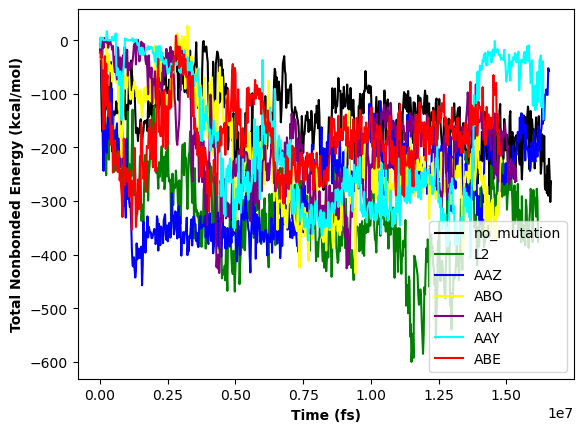

In [10]:
plot = plt.figure()

for i in range(len(names)):
#     plt.plot(df_nb[f'Time (fs)'],df_nb[f'{names[i]}'], alpha = 0.5)
    None
#     print(f"Minimum of {names[i]}: {min(df_nb[f'{names[i]}'])}")
    print(f"Average of {names[i]}: {df_nb[f'{names[i]}'].mean()}")
    
plt.plot(df_nb[f'Time (fs)'],df_nb['dimerization_nfp5_cfp5_no_mutation'], c = 'black',label=f"no_mutation")

plt.plot(df_nb[f'Time (fs)'],df_nb['L2'], c = 'green',label=f"L2")
plt.plot(df_nb[f'Time (fs)'],df_nb['AAZ'], c = 'blue',label=f'AAZ')
# plt.plot(df_nb[f'Time (fs)'],df_nb['12e0c8b2-bad6-40fb-1948-8dec4f65d4d9'], c = 'orange',label=f'12e0c8b2-bad6-40fb-1948-8dec4f65d4d9')
plt.plot(df_nb[f'Time (fs)'],df_nb['ABO'], c = 'yellow',label=f'ABO')
plt.plot(df_nb[f'Time (fs)'],df_nb['AAH'], c = 'purple',label=f'AAH')
plt.plot(df_nb[f'Time (fs)'],df_nb['AAY'], c = 'cyan',label=f'AAY')
plt.plot(df_nb[f'Time (fs)'],df_nb['ABE'], c = 'red',label=f'ABE')

plt.xlabel('Time (fs)',fontweight='bold')
plt.ylabel('Total Nonbonded Energy (kcal/mol)',fontweight='bold')
plt.legend()

# plt.savefig(f'{out_path}/total_nonbonded_energy_all_6_lowest_average_for_Leo.jpeg')
plt.show()

# Plot Van der Waals Energy

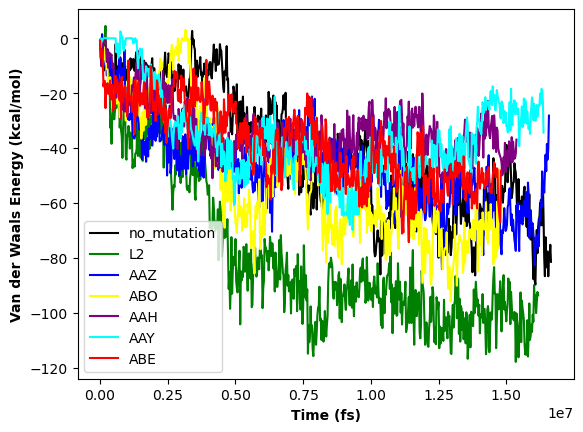

In [94]:
plot = plt.figure()

for i in range(len(names)):
    None
#     plt.plot(df_vdw[f'Time (fs)'],df_vdw[f'{names[i]}'], alpha = 0.5)
#     print(f"Minimum of {names[i]}: {min(df_vdw[f'{names[i]}'])}")
    
plt.plot(df_vdw[f'Time (fs)'],df_vdw['dimerization_nfp5_cfp5_no_mutation'], c = 'black',label=f"no_mutation")

plt.plot(df_vdw[f'Time (fs)'],df_vdw['L2'], c = 'green',label=f"L2")
plt.plot(df_vdw[f'Time (fs)'],df_vdw['AAZ'], c = 'blue',label=f'AAZ')
# plt.plot(df_vdw[f'Time (fs)'],df_vdw['12e0c8b2-bad6-40fb-1948-8dec4f65d4d9'], c = 'orange',label=f'12e0c8b2-bad6-40fb-1948-8dec4f65d4d9')
plt.plot(df_vdw[f'Time (fs)'],df_vdw['ABO'], c = 'yellow',label=f'ABO')
plt.plot(df_vdw[f'Time (fs)'],df_vdw['AAH'], c = 'purple',label=f'AAH')
plt.plot(df_vdw[f'Time (fs)'],df_vdw['AAY'], c = 'cyan',label=f'AAY')
plt.plot(df_vdw[f'Time (fs)'],df_vdw['ABE'], c = 'red',label=f'ABE')

plt.xlabel('Time (fs)',fontweight='bold')
plt.ylabel('Van der Waals Energy (kcal/mol)',fontweight='bold')
plt.legend()

# plt.savefig(f'{out_path}/vanderWaals_energy_all_6_lowest_average_for_Leo.jpeg')
plt.show()

# Plot Electrostatic Potential Energy

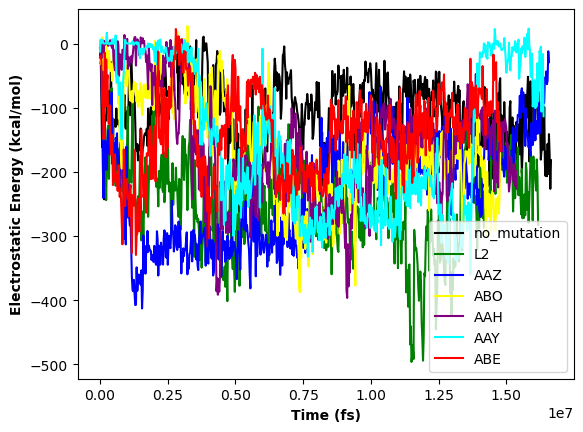

In [95]:
plot = plt.figure()

for i in range(len(names)):
    None
#     plt.plot(df_es[f'Time (fs)'],df_es[f'{names[i]}'], alpha = 0.5)
#     print(f"Minimum of {names[i]}: {min(df_es[f'{names[i]}'])}")
    
plt.plot(df_es[f'Time (fs)'],df_es['dimerization_nfp5_cfp5_no_mutation'], c = 'black',label=f"no_mutation")

plt.plot(df_es[f'Time (fs)'],df_es['L2'], c = 'green',label=f"L2")
plt.plot(df_es[f'Time (fs)'],df_es['AAZ'], c = 'blue',label=f'AAZ')
# plt.plot(df_es[f'Time (fs)'],df_es['12e0c8b2-bad6-40fb-1948-8dec4f65d4d9'], c = 'orange',label=f'12e0c8b2-bad6-40fb-1948-8dec4f65d4d9')
plt.plot(df_es[f'Time (fs)'],df_es['ABO'], c = 'yellow',label=f'ABO')
plt.plot(df_es[f'Time (fs)'],df_es['AAH'], c = 'purple',label=f'AAH')
plt.plot(df_es[f'Time (fs)'],df_es['AAY'], c = 'cyan',label=f'AAY')
plt.plot(df_es[f'Time (fs)'],df_es['ABE'], c = 'red',label=f'ABE')

plt.xlabel('Time (fs)',fontweight='bold')
plt.ylabel('Electrostatic Energy (kcal/mol)',fontweight='bold')
plt.legend()

# plt.savefig(f'{out_path}/elec_energy_all_6_lowest_average_for_Leo.jpeg')
plt.show()

In [23]:
df_nb

,dimerization_nfp5_cfp5_no_mutation,L1,L2,L3,L4,M1,M2,M3,M4,AAA,...,7d41e602-eece-328b-ff7b-118e820865d6,4a84eb03-8d1f-d9b7-4d2b-9deb1beb3711,552f233a-8c25-166a-1ff3-9849b4e1357d,3405095c-8a50-06c1-ec18-8efbd080e66e,8c1745a7-9a6a-5f92-cca7-4147f6be1f72,1775336d-71ea-cd05-49a3-e80e966e1277,5129fb7c-6288-e1a5-cc45-782198a6416d,2f120554-4a53-08cc-3dfa-bc08935ddd72,0870e15c-2fcd-81b5-d24b-ace4307bf326,Time (fs)
0,-31.0763,-8.4002,-23.1065,-8.4137,-22.9650,-9.5277,-22.7648,-9.5277,-23.0377,-23.0284,...,-9.3861,-9.3861,-9.3861,-8.4137,-8.4137,-8.4137,-8.2188,-13.3528,-9.3861,0
1,-25.1951,-3.9520,4.4901,-27.1762,0.0382,-9.6665,-1.6967,9.3789,-36.9616,-45.8702,...,-7.6009,-34.6181,-13.2735,-20.3734,-1.8924,-0.5572,19.8285,0.5624,2.4577,25000
2,-105.8230,7.1330,-5.4581,19.9580,-0.2421,10.3880,-33.1216,2.4147,-21.5068,-19.3638,...,0.2940,-67.1670,-9.6333,-13.9358,-1.2230,0.1561,0.1881,1.5616,5.5182,50000
3,-169.4290,-24.8468,-5.8059,-14.3114,1.1749,-14.8769,-24.5817,-19.7622,-1.9678,-7.2939,...,0.1228,-67.3037,-65.5447,-5.6908,-0.1002,-0.6731,-13.7624,-4.3366,1.1234,75000
4,-76.3055,1.1429,-20.1414,-17.1679,0.0000,-2.6911,-27.6166,13.2283,1.5981,-57.9098,...,0.0000,-31.6908,-63.8010,-19.1667,-13.3658,-4.9032,-30.5478,4.1214,-20.6015,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,-289.9170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16550000
663,-221.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16575000
664,-253.0280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16600000
665,-301.5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16625000
